# House Price Prediction using Decision Tree

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
physical_device = tf.config.experimental.get_visible_devices('GPU')
tf.config.experimental.set_memory_growth(physical_device[0], True)

In [2]:
df = pd.read_csv('input/train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
df.shape

(29451, 12)

# Checking for outliers

<AxesSubplot:>

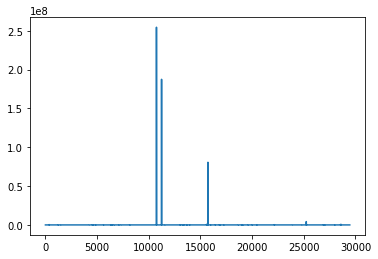

In [4]:
df.SQUARE_FT.plot(kind='line')

<AxesSubplot:>

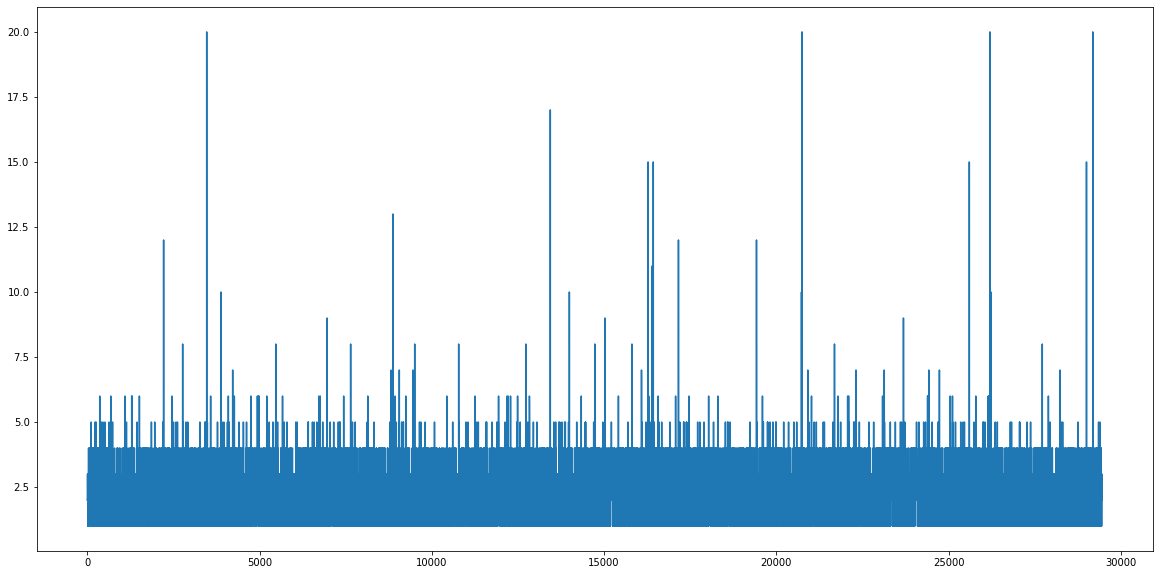

In [5]:
df['BHK_NO.'].plot(kind='line', figsize = (20,10))

<AxesSubplot:>

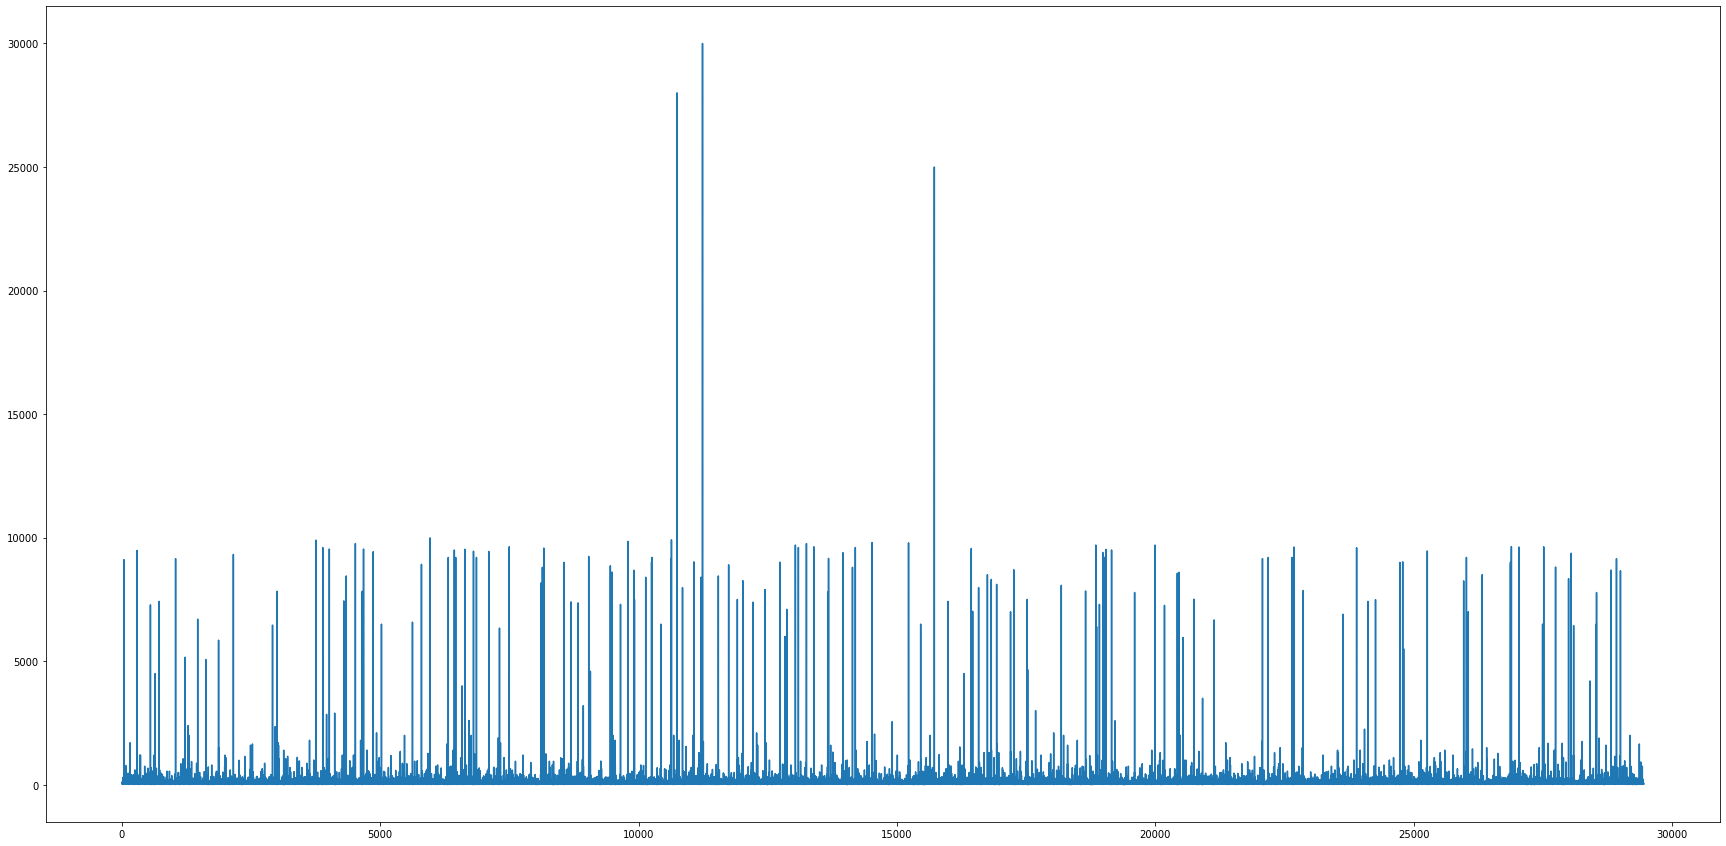

In [6]:
df['TARGET(PRICE_IN_LACS)'].plot(kind='line', figsize = (30,15))

In [7]:
df_train = df[(df['TARGET(PRICE_IN_LACS)']<15000) & 
        (df['SQUARE_FT']<300000) & (df['BHK_NO.']<=6)]
df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29401 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29401 non-null  object 
 1   UNDER_CONSTRUCTION     29401 non-null  int64  
 2   RERA                   29401 non-null  int64  
 3   BHK_NO.                29401 non-null  int64  
 4   BHK_OR_RK              29401 non-null  object 
 5   SQUARE_FT              29401 non-null  float64
 6   READY_TO_MOVE          29401 non-null  int64  
 7   RESALE                 29401 non-null  int64  
 8   ADDRESS                29401 non-null  object 
 9   LONGITUDE              29401 non-null  float64
 10  LATITUDE               29401 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29401 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [9]:
df_test = pd.read_csv('input/test.csv')
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [10]:
df_train.shape

(29401, 12)

In [11]:
df_test.shape

(68720, 11)

In [12]:
df_train.POSTED_BY.value_counts()

Dealer     18276
Owner      10503
Builder      622
Name: POSTED_BY, dtype: int64

In [13]:
def add_cities(df):    
    cities = []
    for i in df.ADDRESS.str.split(","):
        cities.append(i[-1])
    return cities

In [14]:
add_cities(df_train)

['Bangalore',
 'Mysore',
 'Bangalore',
 'Ghaziabad',
 'Kolkata',
 'Kochi',
 'Jaipur',
 'Mohali',
 'Bangalore',
 'Chennai',
 'Siliguri',
 'Bangalore',
 'Bangalore',
 'Noida',
 'Raigad',
 'Noida',
 'Bhubaneswar',
 'Bangalore',
 'Wardha',
 'Bangalore',
 'Chennai',
 'Pune',
 'Noida',
 'Mumbai',
 'Nagpur',
 'Kolkata',
 'Ghaziabad',
 'Mohali',
 'Deoghar',
 'Bhiwadi',
 'Faridabad',
 'Noida',
 'Jaipur',
 'Lalitpur',
 'Maharashtra',
 'Chennai',
 'Pune',
 'Vadodara',
 'Visakhapatnam',
 'Bangalore',
 'Lalitpur',
 'Pune',
 'Pune',
 'Mumbai',
 'Lalitpur',
 'Vapi',
 'Ghaziabad',
 'Lalitpur',
 'Lalitpur',
 'Mangalore',
 'Chennai',
 'Faridabad',
 'Lalitpur',
 'Siliguri',
 'Maharashtra',
 'Faridabad',
 'Aurangabad',
 'Noida',
 'Bangalore',
 'Kolkata',
 'Lalitpur',
 'Jaipur',
 'Lalitpur',
 'Ottapalam',
 'Noida',
 'Faridabad',
 'Mumbai',
 'Bangalore',
 'Jaipur',
 'Faridabad',
 'Vijayawada',
 'Belgaum',
 'Bhopal',
 'Mangalore',
 'Nagpur',
 'Pune',
 'Lalitpur',
 'Lalitpur',
 'Kolkata',
 'Bangalore',
 'Maha

<ipython-input-15-9a2756df094e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['city'] = add_cities(df_train)


<AxesSubplot:>

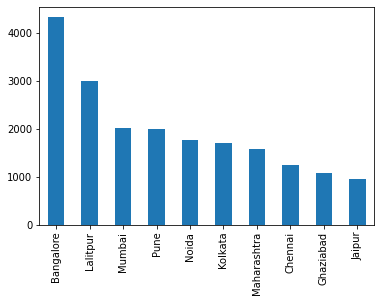

In [15]:
df_train['city'] = add_cities(df_train)
df_train['city'].value_counts()[0:10].plot(kind = 'bar')

In [16]:
df_test['city'] = add_cities(df_test)
df_test['city']

0              Surat
1           Lalitpur
2            Kolkata
3             Jaipur
4             Nadiad
            ...     
68715    Maharashtra
68716         Mohali
68717    Maharashtra
68718           Pune
68719         Mumbai
Name: city, Length: 68720, dtype: object

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29401 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29401 non-null  object 
 1   UNDER_CONSTRUCTION     29401 non-null  int64  
 2   RERA                   29401 non-null  int64  
 3   BHK_NO.                29401 non-null  int64  
 4   BHK_OR_RK              29401 non-null  object 
 5   SQUARE_FT              29401 non-null  float64
 6   READY_TO_MOVE          29401 non-null  int64  
 7   RESALE                 29401 non-null  int64  
 8   ADDRESS                29401 non-null  object 
 9   LONGITUDE              29401 non-null  float64
 10  LATITUDE               29401 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29401 non-null  float64
 12  city                   29401 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 3.1+ MB


In [18]:
df_train['BHK_NO.'].value_counts()

2    13322
3    10542
1     3573
4     1722
5      190
6       52
Name: BHK_NO., dtype: int64

In [19]:
df_train[df_train['BHK_OR_RK'] == 'RK']

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
47,Dealer,0,0,1,RK,475.010326,1,1,"Balkum,Lalitpur",24.690280,78.418890,46.0,Lalitpur
2373,Dealer,0,0,1,RK,350.009052,1,1,"I C Colony,Lalitpur",24.690280,78.418890,58.0,Lalitpur
2685,Dealer,1,0,1,RK,400.000000,0,1,"Sector 8 Airoli,Lalitpur",19.216097,72.821721,45.0,Lalitpur
5623,Owner,0,0,1,RK,375.006335,1,1,"Borivali (East),Lalitpur",19.235000,72.859800,74.0,Lalitpur
8455,Dealer,0,0,1,RK,450.045005,1,1,"Sector 19 Ulwe,Lalitpur",19.049989,73.077321,30.0,Lalitpur
9156,Dealer,1,0,1,RK,196.942082,0,1,"Bhandup (West),Lalitpur",19.147866,72.932609,38.9,Lalitpur
11853,Dealer,0,0,1,RK,350.008077,1,1,"Ramachandra Nagar,Lalitpur",22.720512,75.834224,65.0,Lalitpur
13666,Dealer,1,1,1,RK,440.000000,0,1,"Dronagiri,Lalitpur",24.690280,78.418890,22.0,Lalitpur
14124,Dealer,1,1,1,RK,449.982693,0,1,"Mulund (West),Lalitpur",19.175900,72.952200,65.0,Lalitpur
14400,Dealer,0,0,1,RK,360.023041,1,1,"Rawalpada,Lalitpur",24.690280,78.418890,50.0,Lalitpur


In [20]:
df_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [21]:
def get_dummies_for_column(df, column):
    return pd.get_dummies(df,columns=[column])

In [22]:
df_train_dummied = get_dummies_for_column(df_train, 'BHK_OR_RK')

In [23]:
df_test_dummied = get_dummies_for_column(df_test, 'BHK_OR_RK')

In [24]:
df_test_dummied

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,city,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,Owner,0,0,1,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,Surat,1,0
1,Dealer,1,1,2,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,Lalitpur,1,0
2,Dealer,0,0,2,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,Kolkata,1,0
3,Dealer,0,0,3,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,Jaipur,1,0
4,Owner,0,0,1,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,Nadiad,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330,Maharashtra,1,0
68716,Dealer,0,1,3,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082,Mohali,1,0
68717,Dealer,1,1,1,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231,Maharashtra,1,0
68718,Dealer,0,0,2,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670,Pune,1,0


In [25]:
df_test_dummied.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT',
       'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'city',
       'BHK_OR_RK_BHK', 'BHK_OR_RK_RK'],
      dtype='object')

In [26]:
df_train_dummied = get_dummies_for_column(df_train, 'POSTED_BY')

In [27]:
df_test_dummied = get_dummies_for_column(df_test, 'POSTED_BY')

In [28]:
df_train_dummied.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT',
       'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)', 'city', 'POSTED_BY_Builder',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner'],
      dtype='object')

In [29]:
df_train_dummied

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,0,0,1
1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,0,1,0
2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,0,0,1
3,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,0,0,1
4,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra,0,0,1
29447,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi,0,0,1
29448,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,0,1,0
29449,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,0,0,1


In [30]:
X_train = df_train_dummied[['UNDER_CONSTRUCTION', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE',
       'POSTED_BY_Builder',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner']]
X_test = df_test_dummied[['UNDER_CONSTRUCTION', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE',
       'POSTED_BY_Builder',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner']]
y_train = df_train_dummied[['TARGET(PRICE_IN_LACS)']]

In [31]:
X_train

,UNDER_CONSTRUCTION,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,2,1300.236407,1,1,0,0,1
1,0,2,1275.000000,1,1,0,1,0
2,0,2,933.159722,1,1,0,0,1
3,0,2,929.921143,1,1,0,0,1
4,1,2,999.009247,0,1,0,1,0
...,...,...,...,...,...,...,...,...
29446,0,3,2500.000000,1,1,0,0,1
29447,0,2,769.230769,1,1,0,0,1
29448,0,2,1022.641509,1,1,0,1,0
29449,0,2,927.079009,1,1,0,0,1


In [32]:
y_train

,TARGET(PRICE_IN_LACS)
0,55.0
1,51.0
2,43.0
3,62.5
4,60.5
...,...
29446,45.0
29447,16.0
29448,27.1
29449,67.0


In [33]:
X_train.shape

(29401, 8)

In [34]:
from sklearn.model_selection import train_test_split
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 22)

In [35]:
y_train

,TARGET(PRICE_IN_LACS)
0,55.0
1,51.0
2,43.0
3,62.5
4,60.5
...,...
29446,45.0
29447,16.0
29448,27.1
29449,67.0


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
model2.score(X_val, y_val)

0.9938599357258017

In [37]:
y_predicted = model2.predict(X_test)
y_predicted

array([ 110. ,   63.7,   81.4, ..., 8560. ,   90. ,  210. ])

In [38]:
df_output = pd.read_csv('input/test.csv')
df_output.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
5,Owner,0,0,2,BHK,500.000000,1,1,"Elora Park,Vadodara",21.716412,73.004076
6,Dealer,0,0,1,BHK,724.835886,1,1,"Shirgaon,Maharashtra",19.032025,73.621535
7,Dealer,1,1,1,BHK,778.842862,0,1,"Anjurdive,Mumbai",18.966670,72.833330
8,Dealer,0,0,1,BHK,600.055819,1,1,"Rambaug,Maharashtra",19.243817,73.134692
9,Dealer,0,0,2,BHK,1323.591698,1,1,"Borivali (West),Lalitpur",19.236100,72.833800


In [39]:
df_output['TARGET(PRICE_IN_LACS)'] = y_predicted

In [40]:
df_output.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,110.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,63.7
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,81.4
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,34.0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,6.0
5,Owner,0,0,2,BHK,500.000000,1,1,"Elora Park,Vadodara",21.716412,73.004076,19.5
6,Dealer,0,0,1,BHK,724.835886,1,1,"Shirgaon,Maharashtra",19.032025,73.621535,35.0
7,Dealer,1,1,1,BHK,778.842862,0,1,"Anjurdive,Mumbai",18.966670,72.833330,85.0
8,Dealer,0,0,1,BHK,600.055819,1,1,"Rambaug,Maharashtra",19.243817,73.134692,21.5
9,Dealer,0,0,2,BHK,1323.591698,1,1,"Borivali (West),Lalitpur",19.236100,72.833800,250.0


In [44]:
df_output.to_csv('output.csv')